# **REGULARIZED LOGISTIC REGRESSION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex2data2.txt', header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
data.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


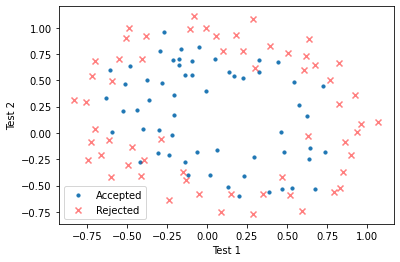

In [4]:
X = data.values[:, :-1]
y = data.values[:, -1]

m, n = X.shape

pos, neg = (y==1).reshape(m, 1), (y==0).reshape(m, 1)

plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], marker='o', s=10)
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c='r', marker='x', alpha=0.5)

plt.xlabel("Test 1")
plt.ylabel("Test 2")

plt.legend(["Accepted", "Rejected"], loc=0)

**FEATURE MAPPING(POLYNOMIAL FEATURES)**
with k variables and degrees of n, the number of polynomial terms:

$ {k+ n \choose n}$


In [5]:
def mapFeature(X1, X2, degree):
    
    m = X1.shape[0]
    out = np.ones(m).reshape(m, 1)
    for i in range(1, degree+1):
        for j in range(i+1):
            poly_feature = (X1 ** (i-j) * X2 ** j).reshape(m, 1)
            out = np.hstack((out, poly_feature))
    return out

X = mapFeature(X[:, 0], X[:, 1], 6)

**SIGMOID FUNCTION**

In [6]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

**REGULARIZED COST FUNCTION**

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$


In [7]:
def costFunctionReg(theta, X, y, Lambda):
    
    m = len(y)
    y = y[:, np.newaxis]
    
    h_theta = sigmoid(X@theta)
    y_pos = -y.T @ np.log(h_theta)
    y_neg = (1-y).T @ np.log(1-h_theta)
    error = y_pos - y_neg
    
#   ((-y * np.log(h_theta)) - ((1-y)*np.log(1-h_theta)))
    
    cost = (1/m) * sum(error)
    reg = (Lambda/(2*m)) * sum(theta[1:] ** 2)
    cost = cost + reg
    
#   ((1/m) * sum((-y * np.log(h_theta)) - ((1-y)*np.log(1-h_theta))) + (Lambda/(2*m)) * sum(theta ** 2))
    J_0 = 1/m * (X.T @ (h_theta - y))[0]
    J_1 = 1/m * (X.T @ (h_theta - y))[1:] + (Lambda/m) * theta[1:]
    grad = np.vstack((J_0[:,np.newaxis], J_1))
    return cost[0], grad

In [8]:
m, n = X.shape

initial_theta = np.zeros((n, 1))
Lambda = 1
cost, grad = costFunctionReg(initial_theta, X, y, Lambda)

print("Cost at initial theta (zeros):",cost)

Cost at initial theta (zeros): 0.6931471805599454


**GRADIENT DESCENT**

In [9]:
def gradientDescent(theta, X, y, alpha, Lambda, n_iters):
    m = len(y)
    J_history = []
    
    for i in range(n_iters):
        cost, grad = costFunctionReg(theta, X, y, Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta, J_history

In [10]:
theta , J_history = gradientDescent(initial_theta, X, y, 1, 0.2, 800)
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

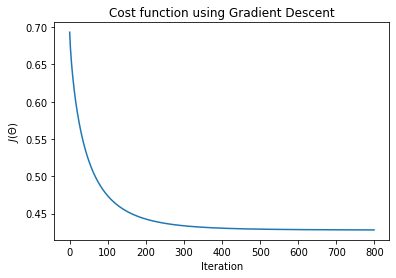

In [11]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

**DECISION BOUNDARY**

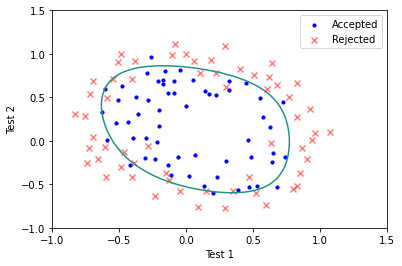

In [12]:
def mapFeaturePlot(x1, x2, degree):
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            poly_feature = (x1 ** (i-j) * x2 ** j)
            out = np.hstack((out, poly_feature))
    return out


raw_X = data.values[:, :-1]
raw_y = data.values[:, -1]
plt.scatter(raw_X[pos[:, 0], 0], raw_X[pos[:, 0], 1], c='b', marker='o', s=10, label="Accepted")
plt.scatter(raw_X[neg[:, 0], 0], raw_X[neg[:, 0], 1], c='r', marker='x', alpha=0.5, label="Rejected")

u_vals = np.linspace(-1, 1.5, 50)
v_vals = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u_vals), len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i], v_vals[j], 6) @ theta

plt.contour(u_vals,v_vals,z.T,0)

plt.xlabel("Test 1")
plt.ylabel("Test 2")

plt.legend(["Accepted", "Rejected"], loc=0)

**ACCURACY**

In [13]:
def predict(theta, X):
    predictions = X@theta
    return sigmoid(predictions) >= 0.55

p = predict(theta, X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Train Accuracy: 86.4406779661017 %
